In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

# Architecture hyperparameter grid search plot
Here the results from the architecture hyperparameter search for the multi GSM dataset are shown.

In [10]:
df = pd.read_csv("multi_emb_lay.csv")

df['divergence_loss'] -= df['n_emb'] / 2
df['loss'] = df['divergence_loss'] + df['reconstruction_loss']

df['test_divergence_loss'] -= df['n_emb'] / 2
df['test_loss'] = df['test_divergence_loss'] + df['test_reconstruction_loss']

# Some of the data is dropeed from the plot, specifically when the n_lay=2 we aren't using non-linearity and it didn't seem fit to include this in the comparison with
# the standard neural networks. There was also some errors with some networks failing to converge for higher layer numbers, I suspect this was due to some errors 
# which occured while the grid-search was running but in the end there wasn't enough time to rerun these runs.
df.drop(index=df[df['n_emb'] > 128].index, inplace=True)
df.drop(index=df[df['n_lay'] > 6].index, inplace=True)
df.drop(index=df[df['n_lay'] == 2].index, inplace=True)

df

,epoch,loss,reconstruction_loss,divergence_loss,stoicheometry_loss,test_loss,test_reconstruction_loss,test_divergence_loss,test_stoicheometry_loss,epochs,...,test_dataset,test_size,save_test_min,weight_decay,beta_S,test_beta_S,main_folder,losses_file,run,use_beta_S_in_test_loss
256,0,1412.854482,1411.427933,1.426548,0.0,1434.438667,1433.041720,1.396947,0.0,256,...,./data/samples/agren_human_cells/k250/test/,8192,True,0.05,0.0,0.0,./data/tuner/agren_40_emb_extra/runs/1,./data/tuner/agren_40_emb_extra/runs/1/losses.csv,1,NaN
257,1,1349.147391,1346.942347,2.205044,0.0,1383.315611,1381.072253,2.243358,0.0,256,...,./data/samples/agren_human_cells/k250/test/,8192,True,0.05,0.0,0.0,./data/tuner/agren_40_emb_extra/runs/1,./data/tuner/agren_40_emb_extra/runs/1/losses.csv,1,NaN
258,2,1339.999707,1337.534200,2.465507,0.0,1366.467807,1363.853387,2.614420,0.0,256,...,./data/samples/agren_human_cells/k250/test/,8192,True,0.05,0.0,0.0,./data/tuner/agren_40_emb_extra/runs/1,./data/tuner/agren_40_emb_extra/runs/1/losses.csv,1,NaN
259,3,1304.760028,1301.756807,3.003221,0.0,1353.569620,1350.555827,3.013794,0.0,256,...,./data/samples/agren_human_cells/k250/test/,8192,True,0.05,0.0,0.0,./data/tuner/agren_40_emb_extra/runs/1,./data/tuner/agren_40_emb_extra/runs/1/losses.csv,1,NaN
260,4,1281.588713,1278.073315,3.515397,0.0,1342.939933,1339.453907,3.486026,0.0,256,...,./data/samples/agren_human_cells/k250/test/,8192,True,0.05,0.0,0.0,./data/tuner/agren_40_emb_extra/runs/1,./data/tuner/agren_40_emb_extra/runs/1/losses.csv,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12928,251,685.918073,670.793668,15.124405,0.0,778.864873,765.661891,13.202983,0.0,256,...,./data/samples/agren_human_cells/k250/test/,8192,True,0.05,0.0,0.0,./data/tuner/agren_40_emb_extra/runs/9,./data/tuner/agren_40_emb_extra/runs/9/losses.csv,51,NaN
12929,252,667.151999,652.043677,15.108322,0.0,778.273960,765.007190,13.266770,0.0,256,...,./data/samples/agren_human_cells/k250/test/,8192,True,0.05,0.0,0.0,./data/tuner/agren_40_emb_extra/runs/9,./data/tuner/agren_40_emb_extra/runs/9/losses.csv,51,NaN
12930,253,653.920290,639.320242,14.600048,0.0,779.938690,766.711138,13.227552,0.0,256,...,./data/samples/agren_human_cells/k250/test/,8192,True,0.05,0.0,0.0,./data/tuner/agren_40_emb_extra/runs/9,./data/tuner/agren_40_emb_extra/runs/9/losses.csv,51,NaN
12931,254,670.798404,655.165510,15.632894,0.0,778.716741,765.479740,13.237001,0.0,256,...,./data/samples/agren_human_cells/k250/test/,8192,True,0.05,0.0,0.0,./data/tuner/agren_40_emb_extra/runs/9,./data/tuner/agren_40_emb_extra/runs/9/losses.csv,51,NaN


In [11]:
n_emb_values = sorted(df['n_emb'].unique())
n_lay_values = sorted(df['n_lay'].unique())

n_n_emb = len(n_emb_values)
n_n_lay = len(n_lay_values)

In [12]:
def get_emb_lay_val(col, min_on='test_loss'):
    A = np.zeros((n_n_emb, n_n_lay))
    for i, n_emb in enumerate(n_emb_values):
        i_df = df[df['n_emb'] == n_emb]
        for j, n_lay in enumerate(n_lay_values):
            ij_df = i_df[i_df['n_lay'] == n_lay]

            if len(ij_df) > 0:
                A[i,j] = float(ij_df.iloc[ij_df[min_on].argmin()][col])

    return A

In [13]:
test_l = get_emb_lay_val('test_loss')
test_dl= get_emb_lay_val('test_divergence_loss')
loss = get_emb_lay_val('loss', min_on='loss')
loss_d = get_emb_lay_val('divergence_loss', min_on='loss')

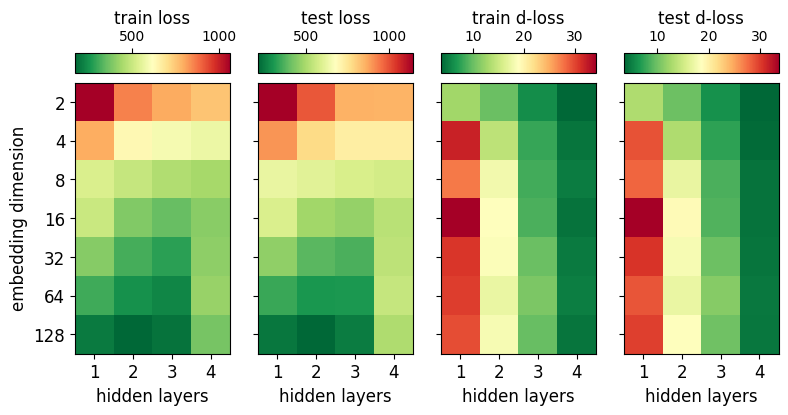

In [14]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(8,4))

fontsize=12

def plot(ax, vals, name, add_y_ticks=True):    
    im = ax.imshow(vals, cmap='RdYlGn_r')

    loc = make_axes_locatable(ax)
    cax = loc.append_axes('top', 0.2, 0.1)
    cbar = plt.colorbar(im, cax=cax, location='top')
    cbar.set_label(name, fontsize=fontsize)

    x = np.arange(n_n_lay)
    y = np.arange(n_n_emb)

    ax.set_xticks(x, np.array(n_lay_values) - 2, fontsize=fontsize)

    ax.set_yticks(y, n_emb_values if add_y_ticks else [], fontsize=fontsize)
    if add_y_ticks:
        ax.set_ylabel("embedding dimension", fontsize=fontsize)
    ax.set_xlabel("hidden layers", fontsize=fontsize)
    

plot(ax1, loss, "train loss")
plot(ax2, test_l, "test loss", False)
plot(ax3, loss_d, "train d-loss", False)
plot(ax4, test_dl, "test d-loss", False)

plt.subplots_adjust(wspace=0.1)

fig.tight_layout()
fig.savefig("./multi_gsm_emb_lay_grid.png", dpi=600)
